In [119]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import cross_validation
from sklearn.preprocessing import LabelBinarizer
import sklearn
import pandas as pd
import numpy as np
import xgboost as xg
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.cluster import FeatureAgglomeration
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [120]:
CROSS_VAL_RESULTS_DICT={}
CROSS_VAL_RESULTS_LIST=[]

In [126]:
c_elegans_basic_cleaned_data = pd.read_csv("../results/dummied_c_elegans_30mers.csv")
c_elegans_features = pd.read_csv("../results/dummied_c_elegans_30mers_w_additional_features.csv")
# c_elegans_features = np.load("../data/c_elegans_features.npy")
# c_elegans_labels = [label.strip() for label in open("../data/c_elegans_names.txt").readlines()]

In [129]:
# df = pd.DataFrame(c_elegans_features, columns=c_elegans_labels)
# df = df.drop(axis = 1, labels = ["Successful Injections", "Success"])
c_elegans_basic_cleaned_data

,Unnamed: 0,Experimenter,sgRNA length,InjectorExperienceLevel,GC count,_pd.Order1_P0,_pd.Order1_P1,_pd.Order1_P2,_pd.Order1_P3,_pd.Order1_P4,...,ScreeningMethod_GFP fluorescence,ScreeningMethod_GFP fluoresence,ScreeningMethod_PCR and/or DNA sequencing,ScreeningMethod_Positive selectable markers,ScreeningMethod_phenotypic analysis,ScreeningMethod_phenotypic analysis,ScreeningMethod_rde phenotypic analysis,RepairMechanism_HR,RepairMechanism_NHEJ,target
0,0,1,23,2,10.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.593750
1,1,1,23,2,6.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.025000
2,2,1,23,2,11.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.085714
3,3,1,23,3,11.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.800000
4,4,1,23,2,12.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.984000
5,5,1,23,2,8.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.091667
6,6,1,23,2,9.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.144444
7,7,1,23,2,6.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.240000
8,8,1,23,2,12.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.702857
9,9,2,22,1,8.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.050000


In [130]:
c_elegans_features

,Unnamed: 0,Experimenter,sgRNA length,InjectorExperienceLevel,sgRNAEnergy,GuideSoftware_No,GuideSoftware_Yes,Success_No,Success_Yes,DNA_DNA,...,NGGX_pd.Order2_P5_0.0,NGGX_pd.Order2_P5_1.0,NGGX_pd.Order2_P6_0.0,NGGX_pd.Order2_P6_1.0,NGGX_pd.Order2_P7_0.0,NGGX_pd.Order2_P8_0.0,NGGX_pd.Order2_P8_1.0,NGGX_pd.Order2_P9_0.0,NGGX_pd.Order2_P9_1.0,target
0,0,1,23,2,-29.0206,1,0,0,1,1,...,1,0,1,0,1,1,0,1,0,0.593750
1,1,1,23,2,-30.0057,1,0,0,1,1,...,1,0,1,0,1,1,0,1,0,0.025000
2,2,1,23,2,-36.3935,1,0,0,1,1,...,1,0,1,0,1,1,0,0,1,0.085714
3,3,1,23,3,-29.0832,1,0,0,1,1,...,1,0,0,1,1,1,0,1,0,0.800000
4,4,1,23,2,-27.9805,1,0,0,1,1,...,1,0,1,0,1,1,0,0,1,0.984000
5,5,1,23,2,-28.9956,1,0,0,1,1,...,0,1,1,0,1,1,0,1,0,0.091667
6,6,1,23,2,-28.6507,1,0,0,1,1,...,1,0,1,0,1,1,0,1,0,0.144444
7,7,1,23,2,-25.4194,1,0,0,1,1,...,1,0,1,0,1,1,0,1,0,0.240000
8,8,1,23,2,-27.9805,1,0,0,1,1,...,1,0,1,0,1,1,0,0,1,0.702857
9,9,2,22,1,-30.4391,0,1,0,1,1,...,1,0,0,1,1,1,0,1,0,0.050000


In [135]:
dummy_df = c_elegans_features
dummy_df.shape

(80, 681)

In [136]:
dummy_df_basic_data = c_elegans_basic_cleaned_data
dummy_df_basic_data.shape

(80, 172)

In [137]:
cols = dummy_df.columns.tolist()
# cols.append(cols.pop(cols.index('lfc')))
dummy_df = dummy_df.reindex(columns= cols)

In [138]:
cols_basic = dummy_df_basic_data.columns.tolist()
dummy_df_basic_data = dummy_df_basic_data.reindex(columns=cols_basic)

In [139]:
dummy_df.columns[-1]

'target'

In [140]:
X, y = dummy_df.iloc[:,:-1].values, dummy_df.iloc[:,-1].values

In [141]:
X2, y2 = dummy_df_basic_data.iloc[:,:-1].values, dummy_df_basic_data.iloc[:,-1].values

In [142]:
basic_model = GradientBoostingRegressor()
basic_cross_val = cross_validation.cross_val_score(estimator=basic_model, X=X2, y=y2, cv = 5, scoring="mean_squared_error")
sum(abs(cross_val))/len(cross_val)

CROSS_VAL_RESULTS_DICT['basic_cross_val'] = basic_cross_val
CROSS_VAL_RESULTS_LIST.append(basic_cross_val)

In [143]:
-sum([-2.51362872, -2.83527368, -2.50070136, -5.03231367, -1.77300729])/5

2.930984944

In [144]:
model = xg.XGBRegressor()
cross_val = cross_validation.cross_val_score(estimator=model, X=X, y=y, cv = 5, scoring="mean_squared_error")

In [145]:
-sum(cross_val)/len(cross_val)

0.031973798449300865

In [146]:
2.930984944/2.3380535190836502

1.2536004501508315

In [147]:
model = xg.XGBRegressor(n_estimators=1000)
cross_val = cross_validation.cross_val_score(estimator=model, X=X, y=y, cv = 5, scoring="mean_squared_error")
CROSS_VAL_RESULTS_DICT['XGBoost'] = cross_val
CROSS_VAL_RESULTS_LIST.append(cross_val)

In [148]:
-sum(cross_val)/len(cross_val)
CROSS_VAL_RESULTS_DICT

{'XGBoost': array([-0.13530348, -0.01836195, -0.00098064, -0.00145408, -0.00345255]),
 'basic_cross_val': array([-0.14171572, -0.00288913, -0.0014737 , -0.00291901, -0.00758138])}

In [149]:
model = RandomForestRegressor(bootstrap=False, max_features=0.35, min_samples_leaf=1, min_samples_split=8, n_estimators=100)
cross_val = cross_validation.cross_val_score(estimator=model, X=X, y=y, cv = 5, scoring="mean_squared_error")
CROSS_VAL_RESULTS_DICT['first iter'] = cross_val
CROSS_VAL_RESULTS_LIST.append(cross_val)

In [150]:
model = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=4)
cross_val = cross_validation.cross_val_score(estimator=model, X=X, y=y, cv = 5, scoring="mean_squared_error")
CROSS_VAL_RESULTS_DICT['second iter'] = cross_val
CROSS_VAL_RESULTS_LIST.append(cross_val)

In [151]:
model = make_pipeline(
    FeatureAgglomeration(affinity="l2", linkage="average"),
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=7, p=2, weights="distance")
)
cross_val = cross_validation.cross_val_score(estimator=model, X=X, y=y, cv = 5, scoring="mean_squared_error")
CROSS_VAL_RESULTS_DICT['third iter'] = cross_val
CROSS_VAL_RESULTS_LIST.append(cross_val)

In [154]:
CROSS_VAL_RESULTS_DICT

{'XGBoost': array([-0.13530348, -0.01836195, -0.00098064, -0.00145408, -0.00345255]),
 'basic_cross_val': array([-0.14171572, -0.00288913, -0.0014737 , -0.00291901, -0.00758138]),
 'first iter': array([-0.1387752 , -0.00840446, -0.00126784, -0.00115435, -0.00319674]),
 'second iter': array([-0.1399284 , -0.00554309, -0.00068455, -0.00334154, -0.00310663]),
 'third iter': array([-0.13552714, -0.00432001, -0.00116693, -0.00138046, -0.00374467])}

In [153]:
CROSS_VAL_RESULTS_LIST

[array([-0.14171572, -0.00288913, -0.0014737 , -0.00291901, -0.00758138]),
 array([-0.13530348, -0.01836195, -0.00098064, -0.00145408, -0.00345255]),
 array([-0.1387752 , -0.00840446, -0.00126784, -0.00115435, -0.00319674]),
 array([-0.1399284 , -0.00554309, -0.00068455, -0.00334154, -0.00310663]),
 array([-0.13552714, -0.00432001, -0.00116693, -0.00138046, -0.00374467])]

In [39]:
[i for i,j in enumerate(dummy_df.columns.values) if j == "lfc"]

[]

In [40]:
! git add baseline.ipynb

In [159]:
names= CROSS_VAL_RESULTS_DICT.keys()
z = zip(names, CROSS_VAL_RESULTS_LIST)
new_array=[]
for index, (string, array) in enumerate(z):
    for value in array:
        new_array.append([string,value])

In [160]:
new_array

[['third iter', -0.14171572091229856],
 ['third iter', -0.002889130513505987],
 ['third iter', -0.0014736996897330872],
 ['third iter', -0.0029190089014609478],
 ['third iter', -0.0075813837638385234],
 ['XGBoost', -0.13530347964635409],
 ['XGBoost', -0.018361954043776836],
 ['XGBoost', -0.0009806368037295263],
 ['XGBoost', -0.0014540770202229876],
 ['XGBoost', -0.0034525472599777835],
 ['basic_cross_val', -0.13877520094029758],
 ['basic_cross_val', -0.0084044582453938078],
 ['basic_cross_val', -0.0012678362447312722],
 ['basic_cross_val', -0.001154345695030086],
 ['basic_cross_val', -0.0031967427404777544],
 ['second iter', -0.13992839755883718],
 ['second iter', -0.0055430877838792171],
 ['second iter', -0.00068454768083413362],
 ['second iter', -0.0033415437342470861],
 ['second iter', -0.0031066337123016549],
 ['first iter', -0.13552713540880362],
 ['first iter', -0.0043200125693606739],
 ['first iter', -0.0011669341876345397],
 ['first iter', -0.0013804603622057225],
 ['first iter

In [162]:
import seaborn as sns

In [173]:
import matplotlib.pyplot as plt
import numpy as np

In [178]:
x = [(i[0]) for i in new_array]
y = [abs(i[1]) for i in new_array]
df = pd.DataFrame()
df['Model'] = pd.Series(x)
df['MSE'] = pd.Series(y)

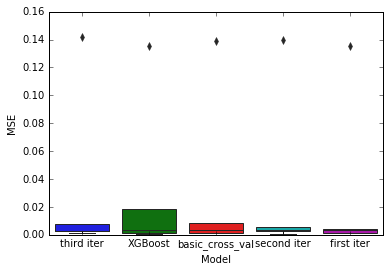

In [179]:
sns.boxplot(x='Model', y='MSE', data=df)
plt.show()